In [3]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path
import pickle
from src.data_analysis.data_analyzer import DataAnalyzer
from src.evaluation.evaluation_metric_ged import GraphEditDistanceMetric
import pandas as pd

In [4]:
from src.evaluation.evaluator_manager import EvaluatorManager
output_folder = module_path + '/examples/output/cg'
stats_folder = module_path + '/examples/stats/'

2023-06-20 09:05:47.232665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/gridengine/lib/lx-amd64:/opt/openmpi/lib
2023-06-20 09:05:47.232833: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## CLEAR

In [ ]:
config_file_path = module_path + '/examples/config/config_tc_custom-oracle_clear_server.json'
output_file_path = module_path + '/examples/output/tree_cycles_custom_oracle/clear_fit_on_tree-cycles_instances-500_nodes_per_inst-28_nodes_in_cycles-7_fold_id_0/results_run-0.json'

# Verifying that the paths are valid
(os.path.isfile(config_file_path), os.path.isfile(output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

#### Executing the pipeline

In [7]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

Finished evaluating for instance 10
evaluated instance with id  10
Finished evaluating for instance 23
evaluated instance with id  23
Finished evaluating for instance 37
evaluated instance with id  37
Finished evaluating for instance 49
evaluated instance with id  49
Finished evaluating for instance 53
evaluated instance with id  53
Finished evaluating for instance 65
evaluated instance with id  65
Finished evaluating for instance 74
evaluated instance with id  74
Finished evaluating for instance 96
evaluated instance with id  96
Finished evaluating for instance 114
evaluated instance with id  114
Finished evaluating for instance 115
evaluated instance with id  115
Finished evaluating for instance 116
evaluated instance with id  116
Finished evaluating for instance 124
evaluated instance with id  124
Finished evaluating for instance 132
evaluated instance with id  132
Finished evaluating for instance 138
evaluated instance with id  138
Finished evaluating for instance 144
evaluated ins

#### Reading the json with the results

In [ ]:
with open(output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

#### Creating the DataAnalyzer

In [ ]:
dtan = DataAnalyzer(output_folder, stats_folder)

#### Saving the results into a pickle

In [ ]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]

In [ ]:
og_instances = ev.dataset.instances
og_url = module_path + '/examples/pickles/og_instances.pickle'
with open(og_url, 'wb') as file:
    pickle.dump(og_instances, file)

In [ ]:
clear_cf_list = ev.explanations
clear_cf_url = module_path + '/examples/pickles/clear_cf_instances.pickle'
with open(clear_cf_url, 'wb') as file:
    pickle.dump(clear_cf_list, file)

## CounteRGAN

In [ ]:
cg_config_file_path = module_path + '/examples/config/config_tc_custom-oracle_countergan_server.json'
cg_output_file_path = module_path + '/examples/output/tree_cycles_custom_oracle/countergan_fit_on_tree-cycles_instances-100_nodes_per_inst-28_nodes_in_cycles-7_fold_id_0/results_run-0.json'

# Verifying that the paths are valid
(os.path.isfile(cg_config_file_path), os.path.isfile(cg_output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

#### Executing the pipeline

In [19]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(cg_config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

evaluated instance with id  10
evaluated instance with id  23
evaluated instance with id  37
evaluated instance with id  49
evaluated instance with id  53
evaluated instance with id  65
evaluated instance with id  74
evaluated instance with id  96
evaluated instance with id  114
evaluated instance with id  115
evaluated instance with id  116
evaluated instance with id  124
evaluated instance with id  132
evaluated instance with id  138
evaluated instance with id  144
evaluated instance with id  166
evaluated instance with id  178
evaluated instance with id  195
evaluated instance with id  210
evaluated instance with id  220
evaluated instance with id  226
evaluated instance with id  230
evaluated instance with id  231
evaluated instance with id  264
evaluated instance with id  266
evaluated instance with id  271
evaluated instance with id  273
evaluated instance with id  283
evaluated instance with id  295
evaluated instance with id  317
evaluated instance with id  318
evaluated instan

#### Reading the json with the results

In [20]:
with open(cg_output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 100, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "countergan", "parameters": {"n_nodes": 28, "batch_size_ratio": 0.1, "device": "cpu", "training_iterations": 50, "real_label": 1, "fake_label": 0, "fold_id": 0}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [1120.1692447662354, 0.007753610610961914, 0.008526086807250977, 0.007210254669189453, 0.007455587387084961, 0.006920337677001953, 0.008034229278564453, 0.007711648941040039, 0.009424924850463867, 0.010678529739379883, 0.008104085922241211, 0.007741212844848633, 0.007749795913696289, 0.007653951644897461, 0.0063610076904296875, 0.0077931880

#### Saving the results into a pickle

In [ ]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]

In [22]:
countergan_cf_list = ev.explanations
countergan_cf_url = module_path + '/examples/pickles/countergan_cf_instances.pickle'
with open(countergan_cf_url, 'wb') as file:
    pickle.dump(countergan_cf_list, file)

## DCE

In [7]:
dce_config_file_path = module_path + '/examples/config/config_tc_custom-oracle_dce_server.json'
dce_output_file_path = module_path + '/examples/output/tree_cycles_custom_oracle/DCESearchExplainer/results_run-0.json'

# Verifying that the paths are valid
(os.path.isfile(dce_config_file_path), os.path.isfile(dce_output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

(True, True, True, True)

#### Executing the pipeline

In [8]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(dce_config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

evaluated instance with id  0
evaluated instance with id  1
evaluated instance with id  2
evaluated instance with id  3
evaluated instance with id  4
evaluated instance with id  5
evaluated instance with id  6
evaluated instance with id  7
evaluated instance with id  8
evaluated instance with id  9
evaluated instance with id  10
evaluated instance with id  11
evaluated instance with id  12
evaluated instance with id  13
evaluated instance with id  14
evaluated instance with id  15
evaluated instance with id  16
evaluated instance with id  17
evaluated instance with id  18
evaluated instance with id  19
evaluated instance with id  20
evaluated instance with id  21
evaluated instance with id  22
evaluated instance with id  23
evaluated instance with id  24
evaluated instance with id  25
evaluated instance with id  26
evaluated instance with id  27
evaluated instance with id  28
evaluated instance with id  29
evaluated instance with id  30
evaluated instance with id  31
evaluated instance

#### Reading the json with the results

In [9]:
with open(dce_output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 500, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "dce_search", "parameters": {"graph_distance": {"name": "graph_edit_distance", "parameters": {}}}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.20350170135498047, 0.18637442588806152, 0.20341205596923828, 0.18787789344787598, 0.1884140968322754, 0.18506813049316406, 0.1862185001373291, 0.1853344440460205, 0.18610620498657227, 0.1855781078338623, 0.18735814094543457, 0.18503522872924805, 0.1851487159729004, 0.18680286407470703, 0.1855776309967041, 0.1847827434539795, 0.18511128425598145, 0.18443775177001953, 0.18500351905822754, 0.1849727630

#### Saving the results into a pickle file

In [10]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]

In [7]:
dce_cf_list = ev.explanations
dce_cf_url = module_path + '/examples/pickles/dce_cf_instances.pickle'
with open(dce_cf_url, 'wb') as file:
    pickle.dump(dce_cf_list, file)

## iRand

In [11]:
irand_config_file_path = module_path + '/examples/config/config_tc_custom-oracle_i-rand_server.json'
irand_output_file_path = module_path + '/examples/output/tree_cycles_custom_oracle/i_rand/results_run-0.json'

# Verifying that the paths are valid
(os.path.isfile(irand_config_file_path), os.path.isfile(irand_output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

(True, True, True, True)

#### Executing the pipeline

In [12]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(irand_config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

evaluated instance with id  0
evaluated instance with id  1
evaluated instance with id  2
evaluated instance with id  3
evaluated instance with id  4
evaluated instance with id  5
evaluated instance with id  6
evaluated instance with id  7
evaluated instance with id  8
evaluated instance with id  9
evaluated instance with id  10
evaluated instance with id  11
evaluated instance with id  12
evaluated instance with id  13
evaluated instance with id  14
evaluated instance with id  15
evaluated instance with id  16
evaluated instance with id  17
evaluated instance with id  18
evaluated instance with id  19
evaluated instance with id  20
evaluated instance with id  21
evaluated instance with id  22
evaluated instance with id  23
evaluated instance with id  24
evaluated instance with id  25
evaluated instance with id  26
evaluated instance with id  27
evaluated instance with id  28
evaluated instance with id  29
evaluated instance with id  30
evaluated instance with id  31
evaluated instance

#### Reading the json with the results

In [13]:
with open(irand_output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 500, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "i-rand", "parameters": {"fold_id": -1, "perturbation_percentage": 0.15, "tries": 10}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.007051944732666016, 0.006173133850097656, 0.01599407196044922, 0.5305838584899902, 0.5431849956512451, 0.005676746368408203, 0.005662202835083008, 0.005850315093994141, 0.006291627883911133, 0.0063173770904541016, 0.5344052314758301, 0.0058977603912353516, 0.005667924880981445, 0.541191577911377, 0.00586700439453125, 0.005717039108276367, 0.005758047103881836, 0.005573749542236328, 0.00597071647644043, 0.005840

#### Saving the results into a pickle file

In [14]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]

In [15]:
irand_cf_list = ev.explanations
irand_cf_url = module_path + '/examples/pickles/i-rand_cf_instances.pickle'
with open(irand_cf_url, 'wb') as file:
    pickle.dump(irand_cf_list, file)

## Visualizing the results

In [16]:
og_file_path = module_path + '/examples/pickles/og_instances.pickle'
dce_file_path = module_path + '/examples/pickles/dce_cf_instances.pickle'
cg_file_path = module_path + '/examples/pickles/countergan_cf_instances.pickle'
clear_file_path = module_path + '/examples/pickles/clear_cf_instances.pickle'
irand_file_path = module_path + '/examples/pickles/i-rand_cf_instances.pickle'

og_instances = []
with open(og_file_path, 'rb') as file:
    og_instances = pickle.load(file)
    print(len(og_instances))

dce_instances = []
with open(dce_file_path, 'rb') as file:
    dce_instances = pickle.load(file)
    print(len(dce_instances))

cg_instances = []
with open(cg_file_path, 'rb') as file:
    cg_instances = pickle.load(file)
    print(len(cg_instances))

clear_instances = []
with open(clear_file_path, 'rb') as file:
    clear_instances = pickle.load(file)
    print(len(clear_instances))

irand_instances = []
with open(irand_file_path, 'rb') as file:
    irand_instances = pickle.load(file)
    print(len(irand_instances))


500
500
50
50
500


In [4]:
def find_instance(inst_list, id):
    for i in range(0, len(inst_list)):
        if inst_list[i].id == id:
            return inst_list[i]
        
    return None

ged = GraphEditDistanceMetric()

In [5]:
cg_class_0 = None
cg_class_1 = None
cg_class_0_min_ged = 10000000000
cg_class_1_min_ged = 10000000000

for cg_i in cg_instances:
    og_i = find_instance(og_instances, cg_i.id)

    if og_i.graph_label == 0:
        current_cls0_ged = ged.evaluate(og_i, cg_i)
        if current_cls0_ged < cg_class_0_min_ged:
            cg_class_0_min_ged = current_cls0_ged
            cg_class_0 = cg_i

    elif og_i.graph_label == 1:
        current_cls1_ged = ged.evaluate(og_i, cg_i)
        if current_cls1_ged < cg_class_1_min_ged:
            cg_class_1_min_ged = current_cls1_ged
            cg_class_1 = cg_i

print(cg_class_0.id)
print(cg_class_1.id)

337
115


In [6]:
og_class_0 = find_instance(og_instances, cg_class_0.id)
og_class_1 = find_instance(og_instances, cg_class_1.id)

dce_class_0 = find_instance(dce_instances, cg_class_0.id)
dce_class_1 = find_instance(dce_instances, cg_class_1.id)

clear_class_0 = find_instance(clear_instances, cg_class_0.id)
clear_class_1 = find_instance(clear_instances, cg_class_1.id)

irand_class_0 = find_instance(irand_instances, cg_class_0.id)
irand_class_1 = find_instance(irand_instances, cg_class_1.id)

print(og_class_0.id, dce_class_0.id, cg_class_0.id, clear_class_0.id, irand_class_0.id)
print(og_class_1.id, dce_class_1.id, cg_class_1.id, clear_class_1.id, irand_class_0.id)

337 337 337 337
115 115 115 115


#### Creating the DataAnalyzer

In [7]:
dtan = DataAnalyzer(output_folder, stats_folder)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

#### Class 0

In [9]:
layout = nx.spring_layout
pos_class_0_og = layout(og_class_0.graph)

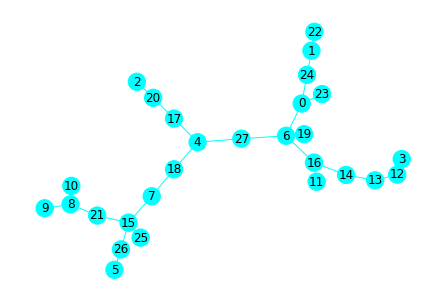

In [11]:
# Save the figure as an SVG file
output_path = module_path + '/examples/img/og_class0.svg'
dtan.draw_graph_custom_position(og_class_0, pos_class_0_og, img_store_address=output_path)

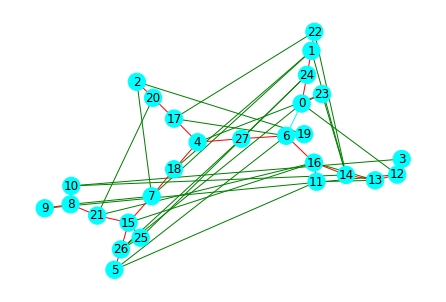

In [12]:
output_path = module_path + '/examples/img/dce_class0.svg'
dtan.draw_counterfactual_actions_custom_position(og_class_0, dce_class_0, position=pos_class_0_og, img_store_address=output_path)

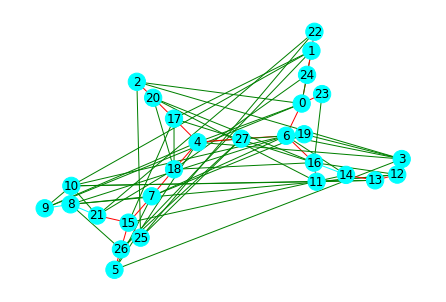

In [13]:
output_path = module_path + '/examples/img/clear_class0.svg'
dtan.draw_counterfactual_actions_custom_position(og_class_0, clear_class_0, position=pos_class_0_og, img_store_address=output_path)

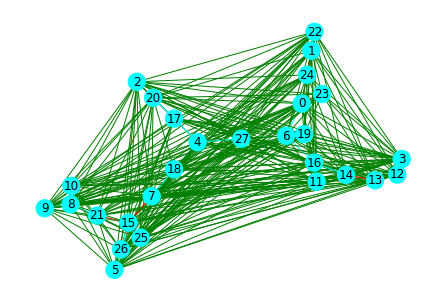

In [14]:
output_path = module_path + '/examples/img/countergan_class0.svg'
dtan.draw_counterfactual_actions_custom_position(og_class_0, cg_class_0, position=pos_class_0_og, img_store_address=output_path)

#### Class 1

In [30]:
pos_class_1_og = layout(og_class_1.graph)

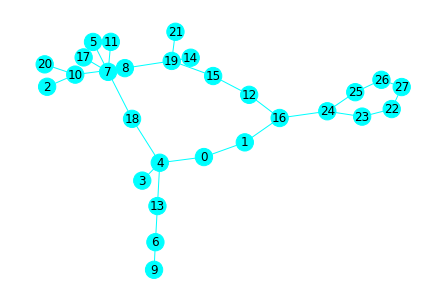

In [32]:
output_path = module_path + '/examples/img/og_class1.svg'
dtan.draw_graph_custom_position(og_class_1, pos_class_1_og, img_store_address=output_path)

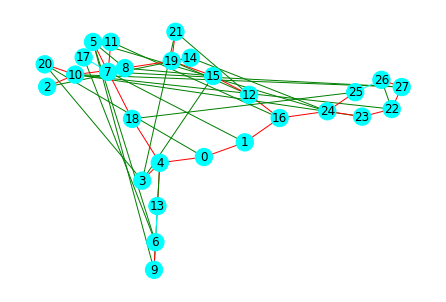

In [33]:
output_path = module_path + '/examples/img/dce_class1.svg'
dtan.draw_counterfactual_actions_custom_position(og_class_1, dce_class_1, position=pos_class_1_og, img_store_address=output_path)

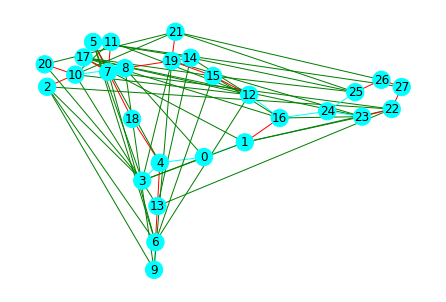

In [34]:
output_path = module_path + '/examples/img/clear_class1.svg'
dtan.draw_counterfactual_actions_custom_position(og_class_1, clear_class_1, position=pos_class_1_og, img_store_address=output_path)

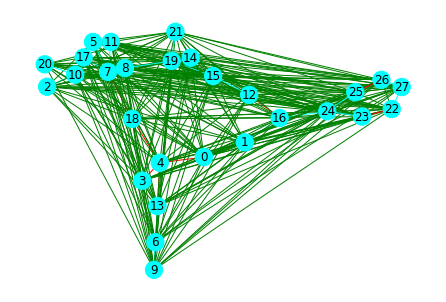

In [35]:
output_path = module_path + '/examples/img/countergan_class1.svg'
dtan.draw_counterfactual_actions_custom_position(og_class_1, cg_class_1, position=pos_class_1_og, img_store_address=output_path)